In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/model-evaluation-utils/model_evaluation_utils.py
/kaggle/input/dogs-vs-cat/train/cat/cat.8293.jpg
/kaggle/input/dogs-vs-cat/train/cat/cat.12433.jpg
/kaggle/input/dogs-vs-cat/train/cat/cat.11836.jpg
/kaggle/input/dogs-vs-cat/train/cat/cat.6910.jpg
/kaggle/input/dogs-vs-cat/train/cat/cat.8788.jpg
/kaggle/input/dogs-vs-cat/train/cat/cat.10738.jpg
/kaggle/input/dogs-vs-cat/train/cat/cat.9550.jpg
/kaggle/input/dogs-vs-cat/train/cat/cat.4912.jpg
/kaggle/input/dogs-vs-cat/train/cat/cat.9861.jpg
/kaggle/input/dogs-vs-cat/train/cat/cat.11634.jpg
/kaggle/input/dogs-vs-cat/train/cat/cat.7954.jpg
/kaggle/input/dogs-vs-cat/train/cat/cat.9807.jpg
/kaggle/input/dogs-vs-cat/train/cat/cat.11604.jpg
/kaggle/input/dogs-vs-cat/train/cat/cat.2725.jpg
/kaggle/input/dogs-vs-cat/train/cat/cat.6568.jpg
/kaggle/input/dogs-vs-cat/train/cat/cat.9591.jpg
/kaggle/input/dogs-vs-cat/train/cat/cat.7066.jpg
/kaggle/input/dogs-vs-cat/train/cat/cat.10029.jpg
/kaggle/input/dogs-vs-cat/train/cat/cat.4351.jpg


In [2]:
# import module we'll need to import our custom module
from shutil import copyfile

# copy our file into the working directory (make sure it has .py suffix)
copyfile(src = "../input/model-evaluation-utils/model_evaluation_utils.py", dst = "../working/model_evaluation_utils.py")

# import all our functions
from model_evaluation_utils import *

In [3]:
#Importing all the dependencies required for the model
from keras.models import Model
import keras
from keras.applications import vgg16
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
from matplotlib import pyplot
from matplotlib.image import imread
from keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

Using TensorFlow backend.


In [4]:
#Create a data generator with some image augmentation.
input_path = '../input/dogs-vs-cat/'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=10,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    input_path + 'train',
    batch_size=64,
    class_mode='binary',
    target_size=(224,224),
    color_mode="rgb")

validation_datagen = ImageDataGenerator(rescale=1./255,
    preprocessing_function=preprocess_input)

validation_generator = validation_datagen.flow_from_directory(
    input_path + 'valid',
    shuffle=False,
    class_mode='binary',
    target_size=(224,224),
    color_mode="rgb")

test_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=10,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
    input_path + 'test1',
    batch_size=64,
    class_mode='binary',
    target_size=(224,224),
    color_mode="rgb")

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 550 images belonging to 2 classes.


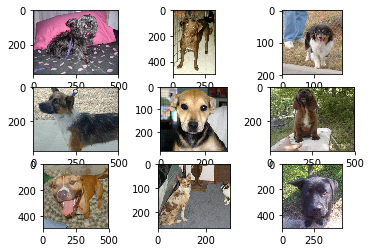

In [5]:
#Lets Plot some of the images of dogs and cat
# plot dog photos from the dogs vs cats valid dataset
# define location of dataset
folder = '../input/dogs-vs-cat/valid/dogs'
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + '/dog.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

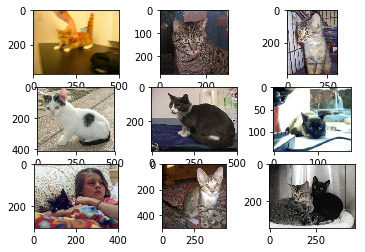

In [6]:
# plot cat photos from the dogs vs cats valid dataset
# define location of dataset
folder = '../input/dogs-vs-cat/valid/cat'
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + '/cat.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

In [7]:

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=(224,224,3))

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)

vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

for layer in vgg_model.layers:
    layer.trainable = False

vgg_model.summary()

import pandas as pd
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])    

58892288/58889256 [==============================] - 3s 0us/step
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7f29a01469b0>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x7f29a0146198>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7f29a0146a58>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7f29a0157f98>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7f29a01313c8>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7f29a013ebe0>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7f29a0160080>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7f29a0160470>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7f29a00d26d8>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7f29a00d2e80>,block3_conv3,False


In [8]:
input_shape = vgg_model.output_shape[1]

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 25088)             14714688  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               12845568  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 27,823,425
Trainable params: 13,108,737
Non-trainable params: 14,714,688
_________________________________

In [9]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=100, 
                              epochs=25,
                              validation_data=validation_generator, 
                              validation_steps=50, 
                              verbose=1
                             )

Epoch 1/25
100/100 [==============================] - 109s 1s/step - loss: 0.5254 - accuracy: 0.7396 - val_loss: 0.3434 - val_accuracy: 0.8963
Epoch 2/25
100/100 [==============================] - 100s 998ms/step - loss: 0.3484 - accuracy: 0.8531 - val_loss: 0.1815 - val_accuracy: 0.9131
Epoch 3/25
100/100 [==============================] - 99s 993ms/step - loss: 0.2907 - accuracy: 0.8763 - val_loss: 0.1821 - val_accuracy: 0.9062
Epoch 4/25
100/100 [==============================] - 92s 916ms/step - loss: 0.2537 - accuracy: 0.8916 - val_loss: 0.2472 - val_accuracy: 0.9175
Epoch 5/25
100/100 [==============================] - 88s 877ms/step - loss: 0.2390 - accuracy: 0.9034 - val_loss: 0.0885 - val_accuracy: 0.9331
Epoch 6/25
100/100 [==============================] - 90s 898ms/step - loss: 0.2315 - accuracy: 0.9055 - val_loss: 0.2745 - val_accuracy: 0.9388
Epoch 7/25
100/100 [==============================] - 88s 878ms/step - loss: 0.2022 - accuracy: 0.9180 - val_loss: 0.1144 - val_acc

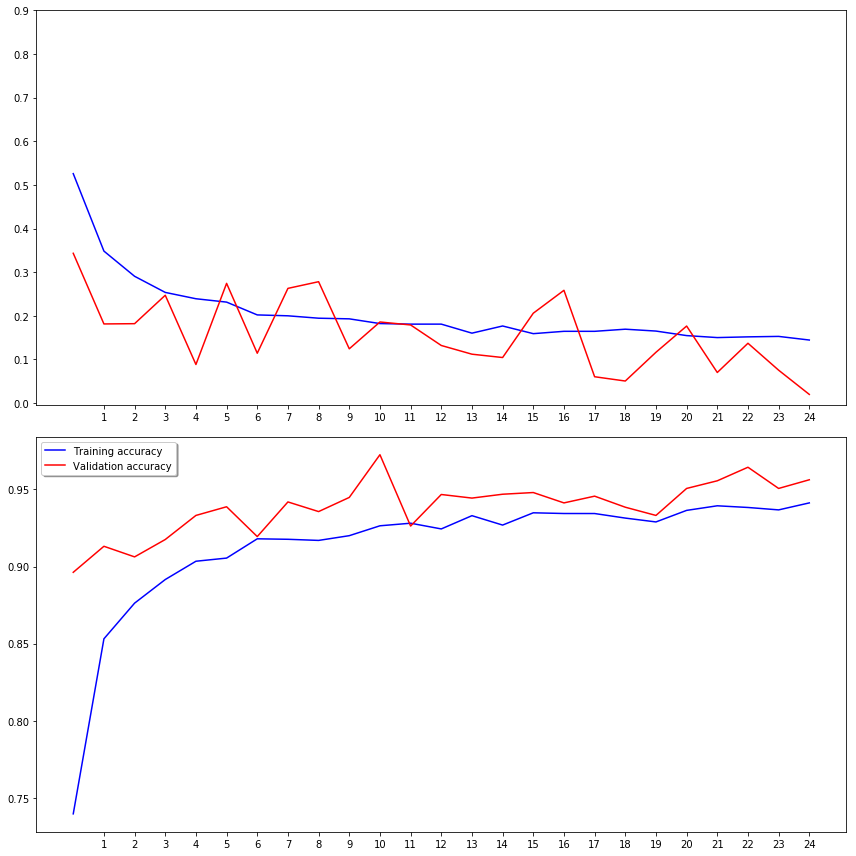

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 25, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 25, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [11]:
model.save('/kaggle/working/transer_learning.h5')

In [12]:
model.save_weights('/kaggle/working/transfer_learning_weights.h5')

In [13]:
_, acc = model.evaluate_generator(test_generator, steps=len(test_generator), verbose=0)
print('> %.3f' % (acc * 100.0))

> 95.636
